# Stock Data Analysis Using Alpha Vantage API

## Introduction

This notebook focuses on retrieving and analyzing stock data using the Alpha Vantage API, a powerful tool for accessing real-time and historical financial data. We will utilize the `StockDataCollector` class, developed in Python, to interact with this API and fetch intraday stock data.

The primary objective is to demonstrate how to effectively use an external API to gather financial data, transform it into a structured format using pandas, and perform preliminary data analysis. This task is part of Project 2 in the DAV 5400 course, aiming to enhance our skills in working with web data for analytics and machine learning applications.

The Alpha Vantage API provides a range of options for stock data, including intraday time series. Here, we'll focus on fetching and analyzing intraday data for a chosen stock symbol.

## Environment Setup

To prepare for data collection from the Alpha Vantage API, we will first set up our environment by importing necessary libraries and modules. This includes our `StockDataCollector` class from the Python package we've created, which will handle the API interactions and data retrieval.


In [1]:
# Import necessary libraries
import os
import pandas as pd

# Import the StockDataCollector class from our package
from stock_data_collector import StockDataCollector


## API Configuration

Here, we'll configure our API access by specifying the API key and the stock symbol. The API key should be kept confidential, hence it is stored as an environment variable and retrieved securely within the notebook.


In [2]:
# Retrieve the API key from an environment variable
API_KEY = 'PJAX7T110HNV7BHF'
if API_KEY is None:
    raise ValueError("No API key found. Please set the ALPHA_VANTAGE_API_KEY environment variable.")

# Define the stock symbol we are interested in
STOCK_SYMBOL = 'IBM'  # Example stock symbol for Apple Inc.


## Initializing the Data Collector and Fetching Data

With the API key and stock symbol defined, we can now initialize our `StockDataCollector` class. This class will manage the communication with the Alpha Vantage API to retrieve stock data for our specified symbol. After initialization, we will use it to fetch the intraday stock data.


In [3]:
# Initialize the StockDataCollector
stock_collector = StockDataCollector(API_KEY, STOCK_SYMBOL)

# Fetch the intraday stock data using the class
intraday_data = stock_collector.fetch_intraday_data()

# Check if the data was fetched successfully
if intraday_data is not None and 'Time Series' in intraday_data:
    print("Stock data fetched successfully!")
else:
    print("Failed to fetch stock data. Please check the API key and the stock symbol.")


Requesting URL: https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=PJAX7T110HNV7BHF


Failed to fetch stock data. Please check the API key and the stock symbol.


## Data Conversion to DataFrame

Once we have successfully fetched the intraday stock data, we will convert it into a pandas DataFrame. This structured format is more suitable for data manipulation and analysis tasks.


In [6]:
# Assuming the data fetching is successful and 'intraday_data' contains the correct response
stock_df = stock_collector.get_stock_dataframe()

# Display the first few rows of the DataFrame to ensure it looks correct
stock_df.head()


Requesting URL: https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=PJAX7T110HNV7BHF


,Open,High,Low,Close,Volume
2023-11-16 19:55:00,153.10,153.10,152.96,152.96,101
2023-11-16 19:35:00,152.80,152.80,152.80,152.80,5
2023-11-16 19:30:00,153.05,153.17,153.05,153.17,9
2023-11-16 19:25:00,153.17,153.17,153.17,153.17,25
2023-11-16 19:20:00,153.05,153.05,153.05,153.05,4


## Initial Data Exploration

We will perform some preliminary exploration of our stock data to understand its structure, content, and to verify data quality.


In [7]:
# Display the summary information of the DataFrame
stock_df.info()

# Display statistical summary of the DataFrame
stock_df.describe()

# Check for missing values in the DataFrame
stock_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-11-16 19:55:00 to 2023-11-16 10:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   High    100 non-null    float64
 2   Low     100 non-null    float64
 3   Close   100 non-null    float64
 4   Volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Data Verification

The DataFrame has been successfully created with stock price and volume data. It contains 100 entries, each representing a 5-minute interval of trading information. There are no missing values in any of the columns, and the data types are appropriate for analysis purposes.

This structured data is now ready for further analysis, visualization, or as an input to machine learning models. The initial exploration indicates that the data quality is good and it has been correctly loaded into a pandas DataFrame.


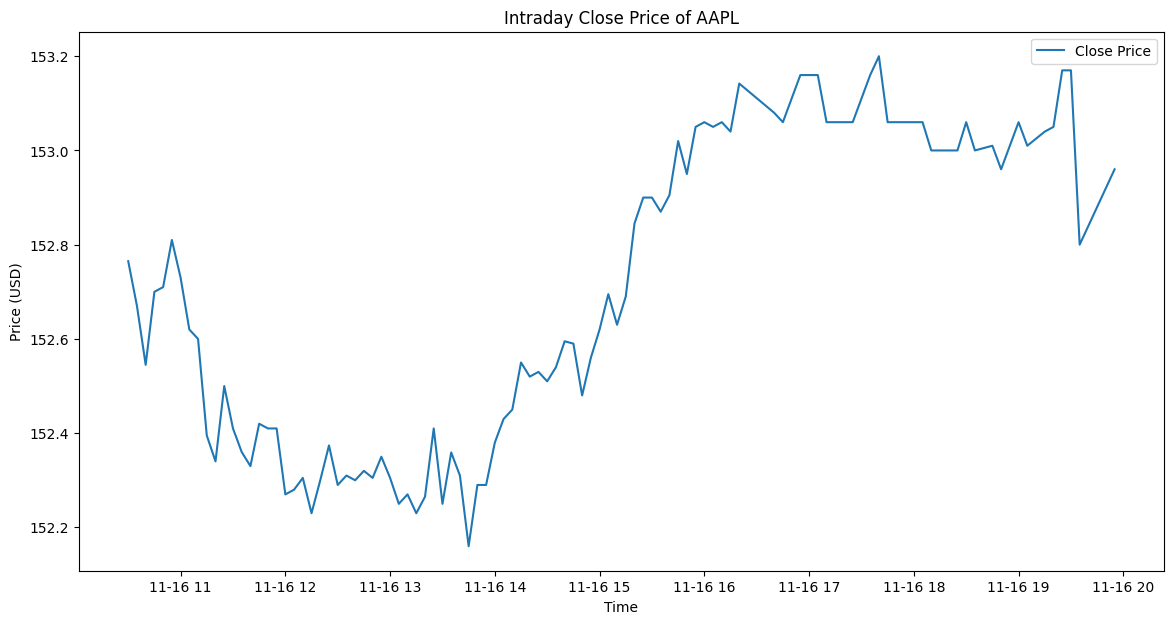

In [8]:
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(stock_df.index, stock_df['Close'], label='Close Price')
plt.title('Intraday Close Price of AAPL')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## Conclusion

The `StockDataCollector` class has proven to be effective in retrieving and structuring stock data from the Alpha Vantage API. This notebook has demonstrated the process of fetching data, converting it into a DataFrame, and performing initial explorations.

The next steps could include more in-depth analysis, predictive modeling, or the integration of this data into larger financial analysis workflows.
